In [1]:
import numpy as np
import scipy.io

import matplotlib.pyplot as plt

plt.rc('figure', facecolor='w')
plt.rc('font', size=14)

In [2]:
raw_data = scipy.io.loadmat(f'data/delta_emle_total.mat', squeeze_me=True)
data = {k: v for k, v in raw_data.items() if hasattr(v, 'shape')}

In [3]:
E_total_dft = data['E_static_dft'] + data['E_induced_dft']
E_total_emle = data['E_static_emle'] + data['E_induced_emle']

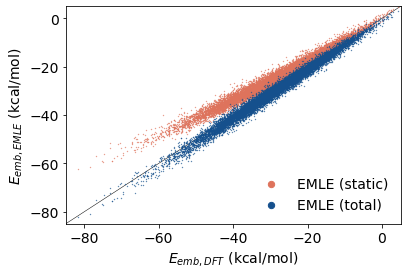

In [4]:
BLUE = "#15508d"
RED = "#de735c"

plt.scatter(E_total_dft, data['E_static_emle'], s=0.1, label='EMLE (static)', c=RED)
plt.scatter(E_total_dft, E_total_emle, s=0.1, label='EMLE (total)', c=BLUE)
plt.plot([-85, 5], [-85, 5], c='black', linewidth=0.5, zorder=-2)
plt.xlim([-85,5])
plt.ylim([-85,5])
plt.xlabel('$E_{emb, DFT}$ (kcal/mol)')
plt.ylabel('$E_{emb, EMLE}$ (kcal/mol)')
plt.legend(markerscale=20, loc='lower right', frameon=False)
plt.savefig('Fig4.png', dpi=300, bbox_inches='tight')
plt.show()